# 전력 유가 환율 EDA

In [1]:
import pandas as pd
import numpy as np
import re
import scipy as super
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [2]:
# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
%matplotlib inline

# 사용자 운영체제 확인
import platform
platform.system()

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [3]:
#전력 데이터와 유가 데이터 불러오기
power_1 = pd.read_excel("전력 일별 가격(1-6월).xlsx")
power_2 = pd.read_excel("전력 일별 가격(6-11월).xlsx")
oil = pd.read_csv("두바이유 내역.csv")
exchange = pd.read_csv("기간별평균환율조회(기간별).csv")

In [4]:
power_1

,날짜,최대가격,최소가격,평균가격
0,2022-01-01,최대 160.07 원/kWh,최소 87.39 원/kWh,평균 125.10 원/kWh
1,2022-01-02,최대 156.17 원/kWh,최소 87.96 원/kWh,평균 114.68 원/kWh
2,2022-01-03,최대 172.74 원/kWh,최소 88.64 원/kWh,평균 151.21 원/kWh
3,2022-01-04,최대 196.49 원/kWh,최소 156.26 원/kWh,평균 162.99 원/kWh
4,2022-01-05,최대 166.88 원/kWh,최소 156.58 원/kWh,평균 161.84 원/kWh
...,...,...,...,...
118,2022-05-27,최대 146.90 원/kWh,최소 129.46 원/kWh,평균 138.46 원/kWh
119,2022-05-28,최대 143.72 원/kWh,최소 126.95 원/kWh,평균 138.38 원/kWh
120,2022-05-29,최대 142.42 원/kWh,최소 105.88 원/kWh,평균 128.59 원/kWh
121,2022-05-30,최대 147.14 원/kWh,최소 110.48 원/kWh,평균 136.46 원/kWh


In [5]:
power_2

,날짜,최대가격,최소가격,평균가격
0,2022-06-01,최대 133.93 원/kWh,최소 123.74 원/kWh,평균 129.43 원/kWh
1,2022-06-02,최대 134.20 원/kWh,최소 117.47 원/kWh,평균 128.77 원/kWh
2,2022-06-03,최대 135.53 원/kWh,최소 120.60 원/kWh,평균 129.93 원/kWh
3,2022-06-04,최대 132.44 원/kWh,최소 119.78 원/kWh,평균 128.11 원/kWh
4,2022-06-05,최대 131.19 원/kWh,최소 113.08 원/kWh,평균 120.34 원/kWh
...,...,...,...,...
150,2022-10-29,최대 263.54 원/kWh,최소 207.63 원/kWh,평균 242.85 원/kWh
151,2022-10-30,최대 283.37 원/kWh,최소 204.70 원/kWh,평균 229.65 원/kWh
152,2022-10-31,최대 296.14 원/kWh,최소 140.37 원/kWh,평균 244.80 원/kWh
153,2022-11-01,최대 292.12 원/kWh,최소 206.60 원/kWh,평균 255.26 원/kWh


In [6]:
oil

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2022- 11- 01,91.22,91.22,91.22,91.22,NaN,0.10%
1,2022- 10- 31,91.13,91.13,91.13,91.13,NaN,0.02%
2,2022- 10- 28,91.11,91.11,91.11,91.11,NaN,-0.18%
3,2022- 10- 27,91.27,91.27,91.27,91.27,NaN,0.12%
4,2022- 10- 26,91.16,91.16,91.16,91.16,NaN,0.35%
...,...,...,...,...,...,...,...
205,2022- 01- 07,79.53,79.53,79.53,79.53,NaN,-0.20%
206,2022- 01- 06,79.69,79.69,79.69,79.69,NaN,1.12%
207,2022- 01- 05,78.81,78.81,78.81,78.81,NaN,1.00%
208,2022- 01- 04,78.03,78.03,78.03,78.03,NaN,1.30%


In [7]:
exchange

,일자,송금,현찰,매매기준율,기준환율,대미 환산율
0,2022.11.23,1339.5,1376.27,"1,352.60ÇÏ¶ô-2.40",1355.7,1
1,2022.11.22,1341.9,1378.71,"1,355.00ÇÏ¶ô-5.00",1352.3,1
2,2022.11.21,1346.9,1383.80,"1,360.00»ó½Â18.50",1340.0,1
3,2022.11.18,1328.5,1364.97,"1,341.50ÇÏ¶ô-10.50",1338.4,1
4,2022.11.17,1338.9,1375.66,"1,352.00»ó½Â24.00",1325.6,1
...,...,...,...,...,...,...
215,2022.01.07,1192.4,1225.07,"1,204.00ÇÏ¶ô-1.00",1199.6,1
216,2022.01.06,1193.4,1226.08,"1,205.00»ó½Â7.00",1198.2,1
217,2022.01.05,1186.4,1218.96,"1,198.00»ó½Â2.00",1194.3,1
218,2022.01.04,1184.4,1216.93,"1,196.00»ó½Â3.00",1190.8,1


### 전력 데이터 전처리

In [8]:
#전력 가격 1~12월 데이터로 합쳐주기
power = pd.concat([power_1, power_2])
power

,날짜,최대가격,최소가격,평균가격
0,2022-01-01,최대 160.07 원/kWh,최소 87.39 원/kWh,평균 125.10 원/kWh
1,2022-01-02,최대 156.17 원/kWh,최소 87.96 원/kWh,평균 114.68 원/kWh
2,2022-01-03,최대 172.74 원/kWh,최소 88.64 원/kWh,평균 151.21 원/kWh
3,2022-01-04,최대 196.49 원/kWh,최소 156.26 원/kWh,평균 162.99 원/kWh
4,2022-01-05,최대 166.88 원/kWh,최소 156.58 원/kWh,평균 161.84 원/kWh
...,...,...,...,...
150,2022-10-29,최대 263.54 원/kWh,최소 207.63 원/kWh,평균 242.85 원/kWh
151,2022-10-30,최대 283.37 원/kWh,최소 204.70 원/kWh,평균 229.65 원/kWh
152,2022-10-31,최대 296.14 원/kWh,최소 140.37 원/kWh,평균 244.80 원/kWh
153,2022-11-01,최대 292.12 원/kWh,최소 206.60 원/kWh,평균 255.26 원/kWh


In [9]:
#전력 가격 평균가격만 뽑아내기
power = power[['날짜', '평균가격']]
power

,날짜,평균가격
0,2022-01-01,평균 125.10 원/kWh
1,2022-01-02,평균 114.68 원/kWh
2,2022-01-03,평균 151.21 원/kWh
3,2022-01-04,평균 162.99 원/kWh
4,2022-01-05,평균 161.84 원/kWh
...,...,...
150,2022-10-29,평균 242.85 원/kWh
151,2022-10-30,평균 229.65 원/kWh
152,2022-10-31,평균 244.80 원/kWh
153,2022-11-01,평균 255.26 원/kWh


In [10]:
power.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278 entries, 0 to 154
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      278 non-null    datetime64[ns]
 1   평균가격    278 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 6.5+ KB


In [11]:
#전력 가격에서 숫자만 추출하기
power['평균가격(원/kWh)'] = power['평균가격'].str.extract(r'(\d+)')
power

/var/folders/3w/jtc4z_yn10n17_mmvxgxl8mw0000gn/T/ipykernel_81180/3712144165.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  power['평균가격(원/kWh)'] = power['평균가격'].str.extract(r'(\d+)')


,날짜,평균가격,평균가격(원/kWh)
0,2022-01-01,평균 125.10 원/kWh,125
1,2022-01-02,평균 114.68 원/kWh,114
2,2022-01-03,평균 151.21 원/kWh,151
3,2022-01-04,평균 162.99 원/kWh,162
4,2022-01-05,평균 161.84 원/kWh,161
...,...,...,...
150,2022-10-29,평균 242.85 원/kWh,242
151,2022-10-30,평균 229.65 원/kWh,229
152,2022-10-31,평균 244.80 원/kWh,244
153,2022-11-01,평균 255.26 원/kWh,255


In [12]:
power = power[['날짜','평균가격(원/kWh)']]

In [13]:
#전력가격.csv 만들어주기
#power.to_csv('전력가격.csv', encoding='utf-8', index=False)

### 결측치 앞 뒤 값으로 채워주기

In [14]:
#전처리한 전력 가격 불러오기
elec = pd.read_csv("전력가격.csv")
elec

,날짜,평균가격(원/kWh)
0,2022-01-01,125
1,2022-01-02,114
2,2022-01-03,151
3,2022-01-04,162
4,2022-01-05,161
...,...,...
273,2022-10-29,242
274,2022-10-30,229
275,2022-10-31,244
276,2022-11-01,255


In [15]:
elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   날짜           278 non-null    object
 1   평균가격(원/kWh)  278 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.5+ KB


In [16]:
elec['날짜'] = pd.to_datetime(elec['날짜'], format = '%Y-%m-%d')
elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   날짜           278 non-null    datetime64[ns]
 1   평균가격(원/kWh)  278 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.5 KB


In [17]:
#전체 날짜 데이터 불러오기
year = pd.read_excel("year.xlsx")
year

,날짜
0,2022-01-01
1,2022-01-02
2,2022-01-03
3,2022-01-04
4,2022-01-05
...,...
301,2022-10-29
302,2022-10-30
303,2022-10-31
304,2022-11-01


In [18]:
year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      306 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.5 KB


In [19]:
elec_year = pd.merge(year, elec, on = "날짜", how='outer')
elec_year

,날짜,평균가격(원/kWh)
0,2022-01-01,125.0
1,2022-01-02,114.0
2,2022-01-03,151.0
3,2022-01-04,162.0
4,2022-01-05,161.0
...,...,...
301,2022-10-29,242.0
302,2022-10-30,229.0
303,2022-10-31,244.0
304,2022-11-01,255.0


In [20]:
elec_year.isna().sum()

날짜              0
평균가격(원/kWh)    28
dtype: int64

In [21]:
#결측값 채우기
elec_year = elec_year.fillna(method='ffill')
elec_year

,날짜,평균가격(원/kWh)
0,2022-01-01,125.0
1,2022-01-02,114.0
2,2022-01-03,151.0
3,2022-01-04,162.0
4,2022-01-05,161.0
...,...,...
301,2022-10-29,242.0
302,2022-10-30,229.0
303,2022-10-31,244.0
304,2022-11-01,255.0


In [22]:
#결측값 확인
elec_year.isna().sum()

날짜             0
평균가격(원/kWh)    0
dtype: int64

In [23]:
#전력가격.csv 만들어주기
#elec_year.to_csv('찐전력가격.csv', encoding='utf-8', index=False)

### 유가 데이터 전처리

In [24]:
#날싸순 정렬
oil = oil.sort_values(by=['날짜'])
oil

,날짜,종가,오픈,고가,저가,거래량,변동 %
209,2022- 01- 03,77.03,77.03,77.03,77.03,NaN,5.25%
208,2022- 01- 04,78.03,78.03,78.03,78.03,NaN,1.30%
207,2022- 01- 05,78.81,78.81,78.81,78.81,NaN,1.00%
206,2022- 01- 06,79.69,79.69,79.69,79.69,NaN,1.12%
205,2022- 01- 07,79.53,79.53,79.53,79.53,NaN,-0.20%
...,...,...,...,...,...,...,...
4,2022- 10- 26,91.16,91.16,91.16,91.16,NaN,0.35%
3,2022- 10- 27,91.27,91.27,91.27,91.27,NaN,0.12%
2,2022- 10- 28,91.11,91.11,91.11,91.11,NaN,-0.18%
1,2022- 10- 31,91.13,91.13,91.13,91.13,NaN,0.02%


In [25]:
#인덱스 정리
oil = oil.reset_index()
oil

,index,날짜,종가,오픈,고가,저가,거래량,변동 %
0,209,2022- 01- 03,77.03,77.03,77.03,77.03,NaN,5.25%
1,208,2022- 01- 04,78.03,78.03,78.03,78.03,NaN,1.30%
2,207,2022- 01- 05,78.81,78.81,78.81,78.81,NaN,1.00%
3,206,2022- 01- 06,79.69,79.69,79.69,79.69,NaN,1.12%
4,205,2022- 01- 07,79.53,79.53,79.53,79.53,NaN,-0.20%
...,...,...,...,...,...,...,...,...
205,4,2022- 10- 26,91.16,91.16,91.16,91.16,NaN,0.35%
206,3,2022- 10- 27,91.27,91.27,91.27,91.27,NaN,0.12%
207,2,2022- 10- 28,91.11,91.11,91.11,91.11,NaN,-0.18%
208,1,2022- 10- 31,91.13,91.13,91.13,91.13,NaN,0.02%


In [26]:
#두바이 유가 종가만 뽑아내기
oil = oil[['날짜', '종가']]
oil

,날짜,종가
0,2022- 01- 03,77.03
1,2022- 01- 04,78.03
2,2022- 01- 05,78.81
3,2022- 01- 06,79.69
4,2022- 01- 07,79.53
...,...,...
205,2022- 10- 26,91.16
206,2022- 10- 27,91.27
207,2022- 10- 28,91.11
208,2022- 10- 31,91.13


In [27]:
oil.isna().sum()

날짜    0
종가    0
dtype: int64

In [28]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      210 non-null    object 
 1   종가      210 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [29]:
power.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278 entries, 0 to 154
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   날짜           278 non-null    datetime64[ns]
 1   평균가격(원/kWh)  278 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 6.5+ KB


In [30]:
#두바이 유가 날짜 object -> datetime 타입 변경
oil['날짜'] = pd.to_datetime(oil['날짜'])
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      210 non-null    datetime64[ns]
 1   종가      210 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


/var/folders/3w/jtc4z_yn10n17_mmvxgxl8mw0000gn/T/ipykernel_81180/2608388467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oil['날짜'] = pd.to_datetime(oil['날짜'])


### 결측치 채워주기

In [31]:
oil_year = pd.merge(year, oil, on = "날짜", how='outer')
oil_year

,날짜,종가
0,2022-01-01,NaN
1,2022-01-02,NaN
2,2022-01-03,77.03
3,2022-01-04,78.03
4,2022-01-05,78.81
...,...,...
301,2022-10-29,NaN
302,2022-10-30,NaN
303,2022-10-31,91.13
304,2022-11-01,91.22


In [32]:
oil_year = oil_year.fillna(method='ffill')
oil_year

,날짜,종가
0,2022-01-01,NaN
1,2022-01-02,NaN
2,2022-01-03,77.03
3,2022-01-04,78.03
4,2022-01-05,78.81
...,...,...
301,2022-10-29,91.11
302,2022-10-30,91.11
303,2022-10-31,91.13
304,2022-11-01,91.22


In [33]:
oil_year = oil_year.fillna(method='bfill')
oil_year

,날짜,종가
0,2022-01-01,77.03
1,2022-01-02,77.03
2,2022-01-03,77.03
3,2022-01-04,78.03
4,2022-01-05,78.81
...,...,...
301,2022-10-29,91.11
302,2022-10-30,91.11
303,2022-10-31,91.13
304,2022-11-01,91.22


In [34]:
oil_year.isna().sum()

날짜    0
종가    0
dtype: int64

In [35]:
#유가.csv 만들어주기
#oil_year.to_csv('찐유가.csv', encoding='utf-8', index=False)

## 환율 데이터 전처리

In [36]:
exchange.head()

,일자,송금,현찰,매매기준율,기준환율,대미 환산율
0,2022.11.23,1339.5,1376.27,"1,352.60ÇÏ¶ô-2.40",1355.7,1
1,2022.11.22,1341.9,1378.71,"1,355.00ÇÏ¶ô-5.00",1352.3,1
2,2022.11.21,1346.9,1383.80,"1,360.00»ó½Â18.50",1340.0,1
3,2022.11.18,1328.5,1364.97,"1,341.50ÇÏ¶ô-10.50",1338.4,1
4,2022.11.17,1338.9,1375.66,"1,352.00»ó½Â24.00",1325.6,1


In [37]:
exchange = exchange[['일자', '기준환율']]
exchange

,일자,기준환율
0,2022.11.23,1355.7
1,2022.11.22,1352.3
2,2022.11.21,1340.0
3,2022.11.18,1338.4
4,2022.11.17,1325.6
...,...,...
215,2022.01.07,1199.6
216,2022.01.06,1198.2
217,2022.01.05,1194.3
218,2022.01.04,1190.8


In [38]:
#컬럼 이름 바꿔주기
exchange = exchange.rename(columns = {'일자' : '날짜', '기준환율' : '환율'})
exchange

,날짜,환율
0,2022.11.23,1355.7
1,2022.11.22,1352.3
2,2022.11.21,1340.0
3,2022.11.18,1338.4
4,2022.11.17,1325.6
...,...,...
215,2022.01.07,1199.6
216,2022.01.06,1198.2
217,2022.01.05,1194.3
218,2022.01.04,1190.8


In [39]:
exchange = exchange[exchange['날짜'].between('2022.01.03', '2022-11-02')]
exchange

,날짜,환율


In [40]:
exchange.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      0 non-null      object 
 1   환율      0 non-null      float64
dtypes: float64(1), object(1)
memory usage: 0.0+ bytes


In [41]:
#두바이 유가 날짜 object -> datetime 타입 변경
exchange['날짜'] = pd.to_datetime(exchange['날짜'])
exchange.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      0 non-null      datetime64[ns]
 1   환율      0 non-null      float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 0.0 bytes


### 결측치 채워주기

In [42]:
ex_year = pd.merge(year, exchange, on = "날짜", how='outer')
ex_year

,날짜,환율
0,2022-01-01,NaN
1,2022-01-02,NaN
2,2022-01-03,NaN
3,2022-01-04,NaN
4,2022-01-05,NaN
...,...,...
301,2022-10-29,NaN
302,2022-10-30,NaN
303,2022-10-31,NaN
304,2022-11-01,NaN


In [43]:
ex_year = ex_year.fillna(method='ffill')
ex_year

,날짜,환율
0,2022-01-01,NaN
1,2022-01-02,NaN
2,2022-01-03,NaN
3,2022-01-04,NaN
4,2022-01-05,NaN
...,...,...
301,2022-10-29,NaN
302,2022-10-30,NaN
303,2022-10-31,NaN
304,2022-11-01,NaN


In [44]:
ex_year = ex_year.fillna(method='bfill')
ex_year

,날짜,환율
0,2022-01-01,NaN
1,2022-01-02,NaN
2,2022-01-03,NaN
3,2022-01-04,NaN
4,2022-01-05,NaN
...,...,...
301,2022-10-29,NaN
302,2022-10-30,NaN
303,2022-10-31,NaN
304,2022-11-01,NaN


In [45]:
ex_year.isna().sum()

날짜      0
환율    306
dtype: int64

In [46]:
#환율.csv 만들어주기
#ex_year.to_csv('찐환율.csv', encoding='utf-8', index=False)

### 두바이 유가 전력 가격 합치기

In [47]:
oil_ = pd.read_csv("찐유가.csv")

In [48]:
power_ = pd.read_csv("찐전력가격.csv")

In [49]:
power_oil = pd.merge(oil_, power_, on = "날짜")
power_oil

,날짜,종가,평균가격(원/kWh)
0,2022-01-01,77.03,125.0
1,2022-01-02,77.03,114.0
2,2022-01-03,77.03,151.0
3,2022-01-04,78.03,162.0
4,2022-01-05,78.81,161.0
...,...,...,...
301,2022-10-29,91.11,242.0
302,2022-10-30,91.11,229.0
303,2022-10-31,91.13,244.0
304,2022-11-01,91.22,255.0


In [50]:
power_oil = power_oil.rename(columns = {'종가' : '두바이_유가', '평균가격(원/kWh)' : '전력_가격'})
power_oil

,날짜,두바이_유가,전력_가격
0,2022-01-01,77.03,125.0
1,2022-01-02,77.03,114.0
2,2022-01-03,77.03,151.0
3,2022-01-04,78.03,162.0
4,2022-01-05,78.81,161.0
...,...,...,...
301,2022-10-29,91.11,242.0
302,2022-10-30,91.11,229.0
303,2022-10-31,91.13,244.0
304,2022-11-01,91.22,255.0


### 유가 전력 데이터에 환율 데이터 합치기

In [51]:
exchange_ = pd.read_csv("찐환율.csv")

In [ ]:
power_oil_exchange = pd.merge(power_oil, exchange_, on = "날짜")
power_oil_exchange

,날짜,두바이_유가,전력_가격,환율
0,2022-01-01,77.03,125.0,1185.5
1,2022-01-02,77.03,114.0,1185.5
2,2022-01-03,77.03,151.0,1185.5
3,2022-01-04,78.03,162.0,1190.8
4,2022-01-05,78.81,161.0,1194.3
...,...,...,...,...
301,2022-10-29,91.11,242.0,1418.1
302,2022-10-30,91.11,229.0,1418.1
303,2022-10-31,91.13,244.0,1419.3
304,2022-11-01,91.22,255.0,1422.2


In [53]:
#데이터 내보내기
#power_oil_exchange.to_csv('찐유가_전력_환율_전처리.csv', encoding='utf-8', index=False)

### 변수들간 상관관계 확인

In [54]:
a = pd.read_csv("찐유가_전력_환율_전처리.csv")
a

,날짜,두바이_유가,전력_가격,환율
0,2022-01-01,77.03,125.0,1185.5
1,2022-01-02,77.03,114.0,1185.5
2,2022-01-03,77.03,151.0,1185.5
3,2022-01-04,78.03,162.0,1190.8
4,2022-01-05,78.81,161.0,1194.3
...,...,...,...,...
301,2022-10-29,91.11,242.0,1418.1
302,2022-10-30,91.11,229.0,1418.1
303,2022-10-31,91.13,244.0,1419.3
304,2022-11-01,91.22,255.0,1422.2


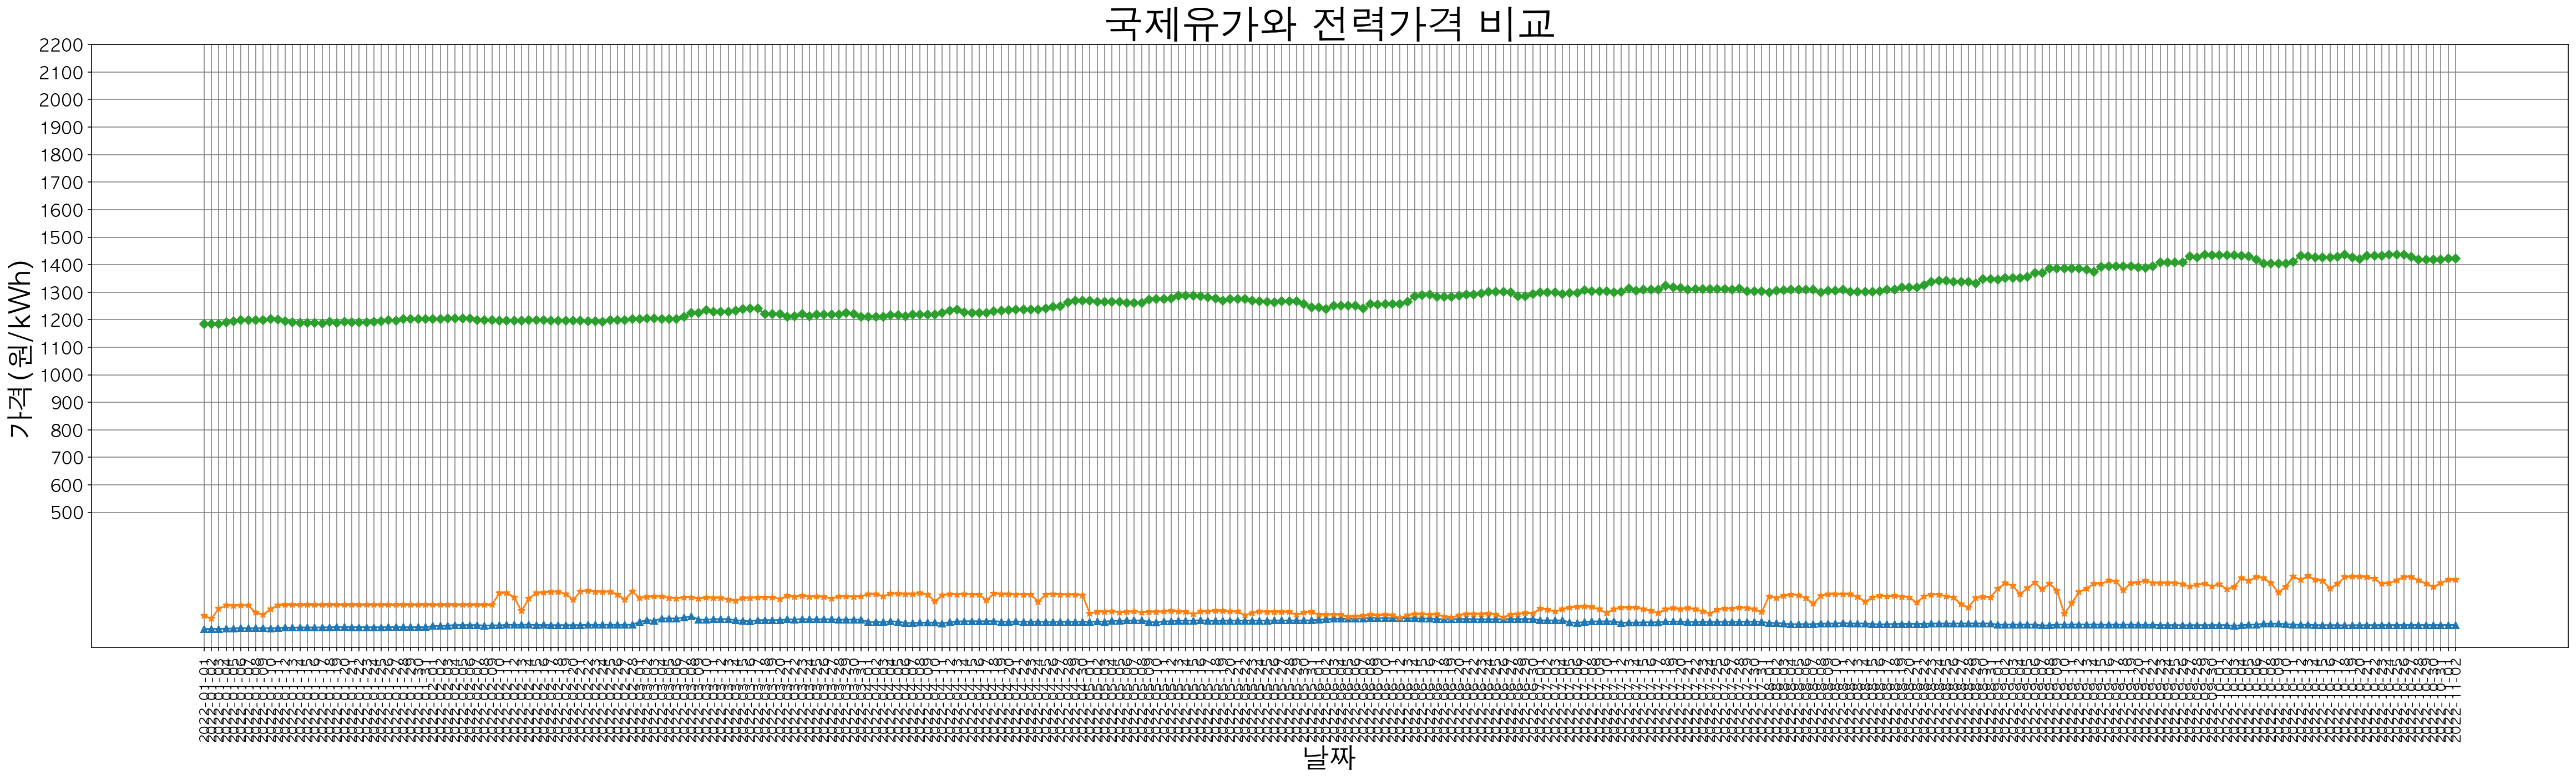

In [55]:
ax1 = a.날짜
ax2 = a.두바이_유가
ax3 = a.전력_가격
ax4 = a.환율


plt.figure(figsize=(40,10))
a = plt.plot(ax1, ax2, label="원유 가격", marker="^") # 원유 가격
b = plt.plot(ax1, ax3, label="전력 평균 가격", marker="*") # 전력 평균 가격
c = plt.plot(ax1, ax4, label="환율", marker="D") # 환율
p = [a,b,c]


plt.title("국제유가와 전력가격 비교", fontsize=35)
plt.xticks(ax1, fontsize=12, rotation=90) # x축
plt.yticks(np.arange(500, 2300, 100) ,fontsize=15) # y축
plt.xlabel("날짜", fontsize=25) #x 축 이름
plt.ylabel("가격(원/kWh)", fontsize=25) # y축 이름
#plt.legend(loc="best",ncol=2, fontsize= 20, shadow=True) # 범례
plt.grid(color="grey")


plt.show()

### 유가 전력가 환율의 상관계수 확인

In [56]:
a = pd.read_csv("찐유가_전력_환율_전처리.csv")
a

,날짜,두바이_유가,전력_가격,환율
0,2022-01-01,77.03,125.0,1185.5
1,2022-01-02,77.03,114.0,1185.5
2,2022-01-03,77.03,151.0,1185.5
3,2022-01-04,78.03,162.0,1190.8
4,2022-01-05,78.81,161.0,1194.3
...,...,...,...,...
301,2022-10-29,91.11,242.0,1418.1
302,2022-10-30,91.11,229.0,1418.1
303,2022-10-31,91.13,244.0,1419.3
304,2022-11-01,91.22,255.0,1422.2


In [57]:
a.corr(method='pearson')

,두바이_유가,전력_가격,환율
두바이_유가,1.000000,-0.400813,-0.118149
전력_가격,-0.400813,1.000000,0.525403
환율,-0.118149,0.525403,1.000000


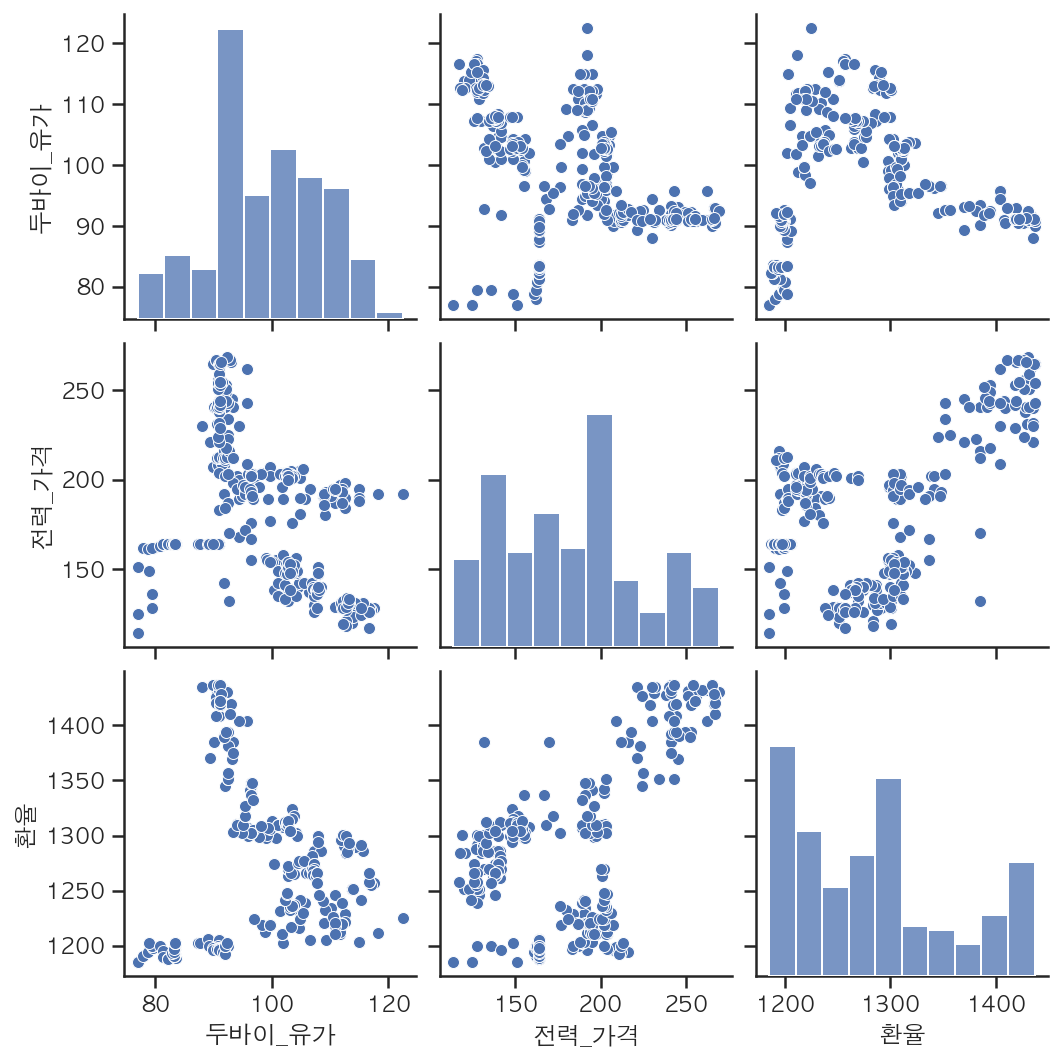

In [58]:
#그래프 시각화
sns.set(style='ticks', color_codes=True)
plt.rcParams["font.family"] = "AppleGothic" #폰트 적용
sns.pairplot(a)
plt.show()

#### 전력가격 / 환율 가격은 대체적으로 양의 관계가 보인다(상관계수로 설명)
#### 두바이_유가 / 전력_가격 은 대체적으로 음의 관계가 보인다
#### 전력가격-환율:0.528503, 유가-전력 : -0.572465 => 다소 높음
#### 휘발유와 경유 가격이 양의관계로 올라가다, 우크라이나 전쟁으로 인해 음의 관계로 바뀌었다.

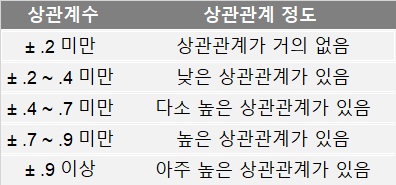

# 상관관계

In [59]:
a = pd.read_csv("찐유가_전력_환율_전처리.csv")
a

,날짜,두바이_유가,전력_가격,환율
0,2022-01-01,77.03,125.0,1185.5
1,2022-01-02,77.03,114.0,1185.5
2,2022-01-03,77.03,151.0,1185.5
3,2022-01-04,78.03,162.0,1190.8
4,2022-01-05,78.81,161.0,1194.3
...,...,...,...,...
301,2022-10-29,91.11,242.0,1418.1
302,2022-10-30,91.11,229.0,1418.1
303,2022-10-31,91.13,244.0,1419.3
304,2022-11-01,91.22,255.0,1422.2


In [60]:
a['전력_가격_log'] = np.log1p(a['전력_가격'])
a

,날짜,두바이_유가,전력_가격,환율,전력_가격_log
0,2022-01-01,77.03,125.0,1185.5,4.836282
1,2022-01-02,77.03,114.0,1185.5,4.744932
2,2022-01-03,77.03,151.0,1185.5,5.023881
3,2022-01-04,78.03,162.0,1190.8,5.093750
4,2022-01-05,78.81,161.0,1194.3,5.087596
...,...,...,...,...,...
301,2022-10-29,91.11,242.0,1418.1,5.493061
302,2022-10-30,91.11,229.0,1418.1,5.438079
303,2022-10-31,91.13,244.0,1419.3,5.501258
304,2022-11-01,91.22,255.0,1422.2,5.545177


In [61]:
x_train = a[['두바이_유가', '환율']]

In [62]:
target = a['전력_가격_log']

In [63]:
a_corr = a[['두바이_유가', '전력_가격', '환율']]

<AxesSubplot:title={'center':'전력 유가 환율 상관관계'}>

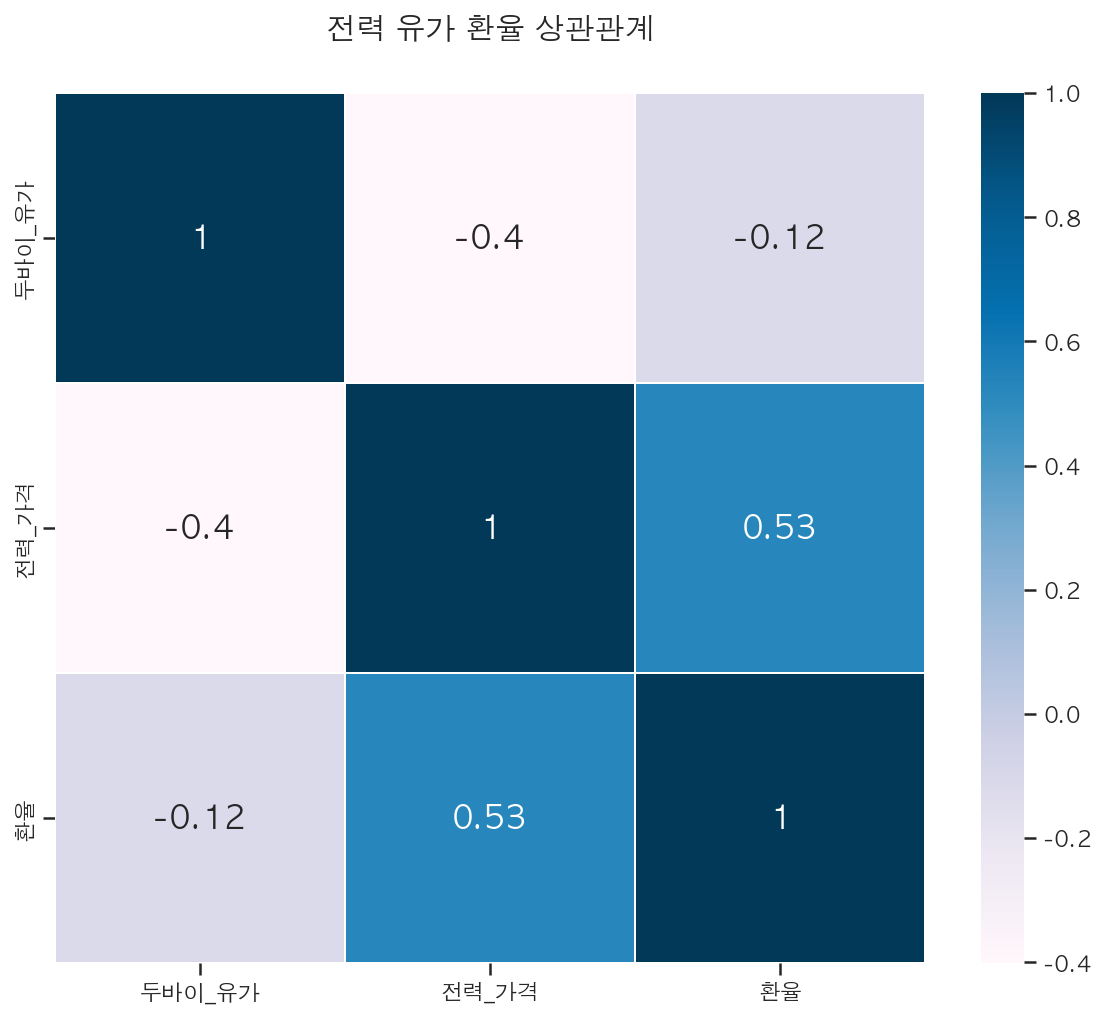

In [64]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("전력 유가 환율 상관관계", y = 1.05, size = 15)
sns.heatmap(a_corr.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

In [2]:
# 전력 유가 환율 데이터 불러오기
df = pd.read_csv("찐유가_전력_환율_전처리.csv")
df

,날짜,두바이_유가,전력_가격,환율
0,2022-01-01,77.03,125.0,1185.5
1,2022-01-02,77.03,114.0,1185.5
2,2022-01-03,77.03,151.0,1185.5
3,2022-01-04,78.03,162.0,1190.8
4,2022-01-05,78.81,161.0,1194.3
...,...,...,...,...
301,2022-10-29,91.11,242.0,1418.1
302,2022-10-30,91.11,229.0,1418.1
303,2022-10-31,91.13,244.0,1419.3
304,2022-11-01,91.22,255.0,1422.2


In [4]:
df.set_index('날짜', inplace=True)
df

,두바이_유가,전력_가격,환율
날짜,,,
2022-01-01,77.03,125.0,1185.5
2022-01-02,77.03,114.0,1185.5
2022-01-03,77.03,151.0,1185.5
2022-01-04,78.03,162.0,1190.8
2022-01-05,78.81,161.0,1194.3
...,...,...,...
2022-10-29,91.11,242.0,1418.1
2022-10-30,91.11,229.0,1418.1
2022-10-31,91.13,244.0,1419.3


In [5]:
df.to_csv('인덱싱유가_전력_환율_전처리.csv', encoding='utf-8', index=False)